## Amazon Review

Sentiment analysis is a machine learning model used for understanding natural languages. It is used for identifying the feeling behind a particular text, i.e. whether the text means happy, sad, angry and so on.

This could be used in multiple scenarios like a big brand don't need to go through every review to know how it's users are reacting. Whether they can run sentiment analysis to extract the feeling information for their brand.

Here, we will be building such model from amazon's review dataset and we'll use Random Forest for this task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction import text
from gensim.models import Word2Vec
from nltk.corpus import stopwords

%matplotlib inline

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


In [2]:
df = pd.read_json('/home/vivek/Downloads/Tools_and_Home_Improvement_5.json', lines=True)

In [3]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,104800001X,"[0, 1]",5,"I hate it when my shirt collars, not otherwise...","01 29, 2014",A4IL0CLL27Q33,D. Brennan,Perfect for collar stay management,1390953600
1,104800001X,"[0, 0]",5,These little magnets are really powerful for t...,"05 31, 2013",A3Q5W5E7TDVLJF,funnyc130,Neat,1369958400
2,104800001X,"[0, 0]",5,I wanted something this small to mount on the ...,"03 13, 2013",A37KNOJXE2FU6,Joseph Yonke II,Very small and thin,1363132800
3,104800001X,"[0, 0]",5,I use these to magnetize my Warhammer 40K mini...,"06 16, 2013",A3U4AFML9SZPWK,"Leith Tussing ""I like tacos.""",Excellent hobby magnets,1371340800
4,104800001X,"[23, 25]",5,They are soo freaking annoying!! Why?! You sp...,"08 9, 2013",A36Y7X194VWVKA,Mark D.,They're annoying... which is why they get five...,1376006400


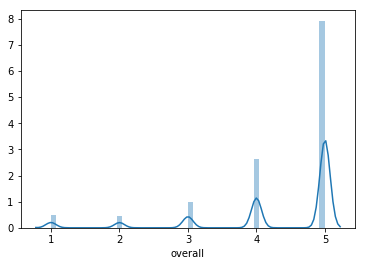

In [4]:
sns.distplot(df['overall'])

In [15]:
tokenized_text = [nltk.word_tokenize(x) for x in df['reviewText']]

### Converting text to features

First we need to convert our text to features and then pass it to model. We need to use Vectorization, which will convert text to features using different algorithms. We will compare 3 different Vectorization techniques here:

    1. word2vec
    2. tf-idf vectorization
    3. count vectorization

In [16]:
X = Word2Vec(tokenized_text)
Y = df['overall']

In [17]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
rfc.fit(X,Y)
y_pred = rfc.predict(X)
print(rfc.score(X,Y))

ValueError: setting an array element with a sequence.

In [5]:
vectorizer = text.TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(df['reviewText']).toarray()

In [7]:
Y = df['overall']

In [12]:
print(X[100000:].shape)
print(Y[100000:].shape)

(34476, 1500)
(34476,)


In [14]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
rfc.fit(X,Y)
y_pred = rfc.predict(X)
print(rfc.score(X,Y))

0.6340610964038192


In [18]:
vectorizer = text.CountVectorizer()
X = vectorizer.fit_transform(df['reviewText']).toarray()
Y = df['overall']

MemoryError: 

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
rfc.fit(X,Y)
y_pred = rfc.predict(X)
print(rfc.score(X,Y))